# Import Library

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import itertools
from statsmodels.stats.diagnostic import acorr_ljungbox, normal_ad

In [27]:
df = pd.read_excel(r"C:\Users\AS\Pictures\buat infog\IMC 25\Data Listrik indonesia perkapita.xlsx")
df

,Nama Data,Konsumsi Listrik per Kapita Indonesia
0,1971-12-31,14.30
1,1972-12-31,15.83
2,1973-12-31,15.76
3,1974-12-31,19.11
4,1975-12-31,21.36
5,1976-12-31,18.26
6,1977-12-31,21.64
7,1978-12-31,31.62
8,1979-12-31,38.50
9,1980-12-31,45.95


In [28]:
# Ubah nama kolom "Nama Data" menjadi "Tanggal"
df = df.rename(columns={"Nama Data": "Tanggal"})

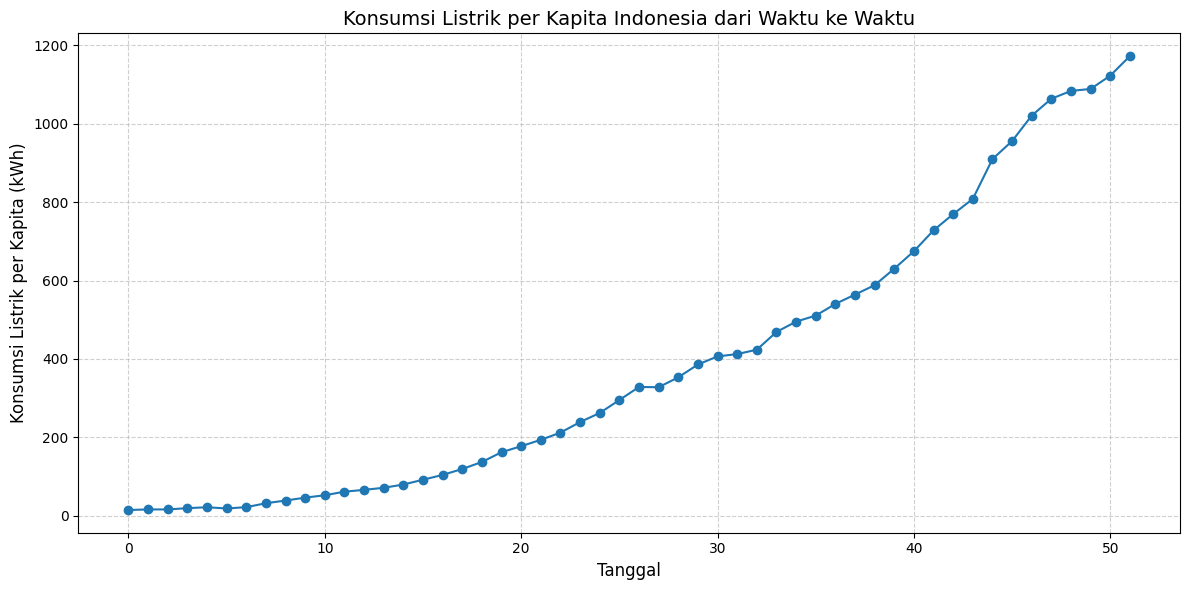

In [29]:
# Pastikan kolom tanggal sudah dalam format datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Plot time series
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Konsumsi Listrik per Kapita Indonesia'], marker='o', linestyle='-')

# Judul dan label
plt.title('Konsumsi Listrik per Kapita Indonesia dari Waktu ke Waktu', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Konsumsi Listrik per Kapita (kWh)', fontsize=12)

# Grid & layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Tanggal                                52 non-null     datetime64[ns]
 1   Konsumsi Listrik per Kapita Indonesia  52 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 964.0 bytes


In [31]:
df['Konsumsi Listrik per Kapita Indonesia'].describe()

count      52.000000
mean      392.286731
std       361.360441
min        14.300000
25%        69.760000
50%       311.375000
75%       598.665000
max      1173.000000
Name: Konsumsi Listrik per Kapita Indonesia, dtype: float64

In [32]:
df.isnull().sum()

Tanggal                                  0
Konsumsi Listrik per Kapita Indonesia    0
dtype: int64

# Distribusi

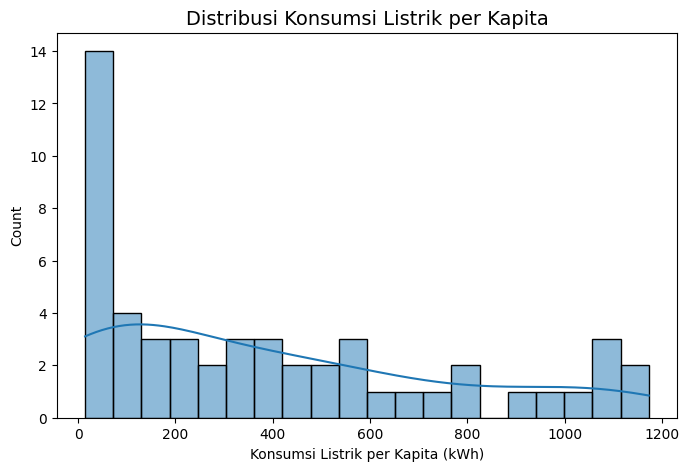

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['Konsumsi Listrik per Kapita Indonesia'], bins=20, kde=True)
plt.title('Distribusi Konsumsi Listrik per Kapita', fontsize=14)
plt.xlabel('Konsumsi Listrik per Kapita (kWh)')
plt.show()

# Boxplot

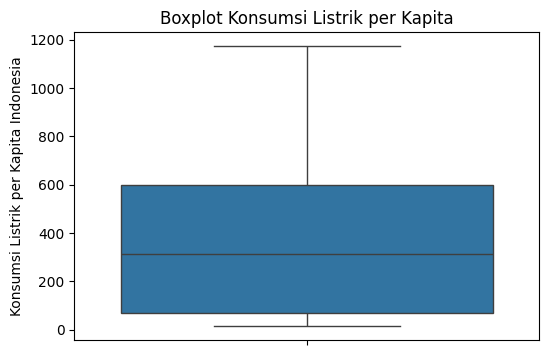

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Konsumsi Listrik per Kapita Indonesia'])
plt.title('Boxplot Konsumsi Listrik per Kapita')
plt.show()

# Plot ACF

<Figure size 1500x500 with 0 Axes>

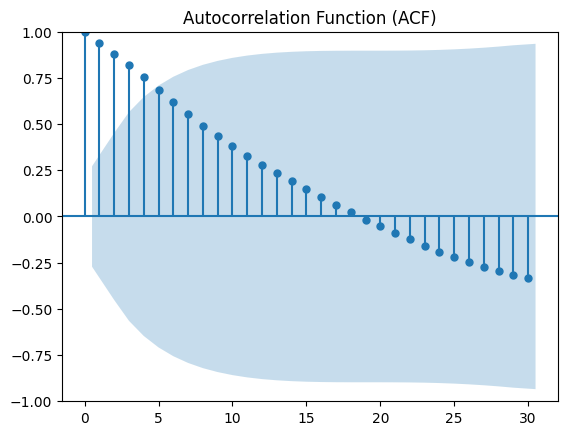

In [35]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(15,5))
plot_acf(df['Konsumsi Listrik per Kapita Indonesia'].dropna(), lags=30)
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Dekomposisi

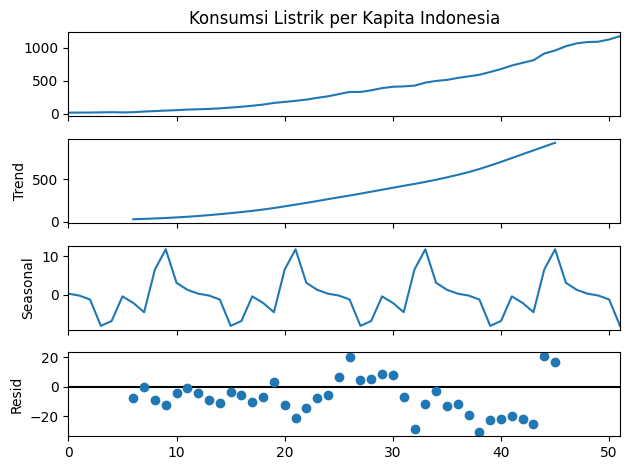

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Konsumsi Listrik per Kapita Indonesia'], model='additive', period=12)
decomposition.plot()
plt.show()

# Stasioneritas

In [37]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Konsumsi Listrik per Kapita Indonesia'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 3.1240760837400026
p-value: 1.0


# DES

C:\Users\AS\AppData\Local\Temp\ipykernel_20436\3490581376.py:43: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
C:\Users\AS\AppData\Local\Temp\ipykernel_20436\3490581376.py:43: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
C:\Users\AS\AppData\Local\Temp\ipykernel_20436\3490581376.py:43: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
C:\Users\AS\AppData\Local\Temp\ipykernel_20436\3490581376.py:43: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
C:\Users\AS\AppData\Local\Temp\ipykernel_20436\349058137

Best params: α=0.90, β=0.90, MAPE=3.21%


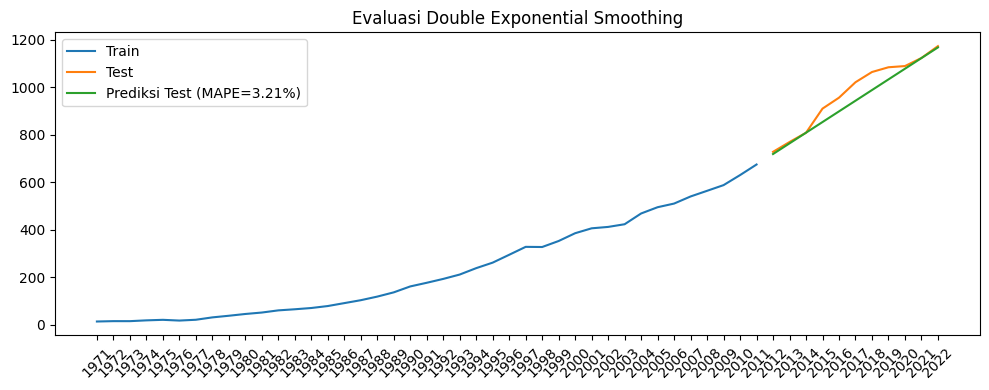

C:\Users\AS\AppData\Local\Temp\ipykernel_20436\3490581376.py:75: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  final_model = Holt(y, initialization_method="estimated").fit(



Forecast 2023–2027:
2023    1218.145239
2024    1265.847767
2025    1313.550294
2026    1361.252822
2027    1408.955350
Freq: Y-DEC, dtype: float64


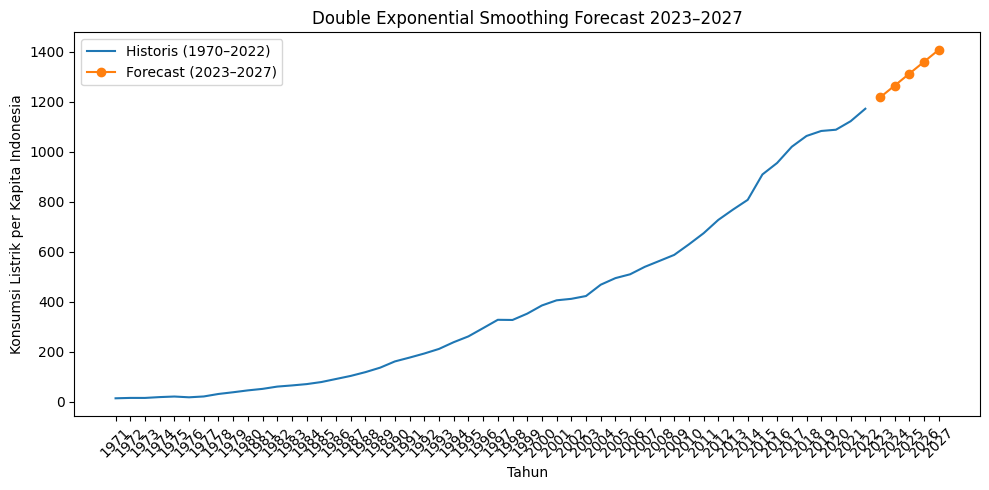

In [38]:
# ===== Double Exponential Smoothing (Holt) dengan Train-Test, Tuning, Forecast =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# -----------------------------
# 1) Siapkan data
# -----------------------------
# Pastikan kolom: "Tanggal" (tahun) & "Konsumsi Listrik per Kapita Indonesia"
df["Tanggal"] = pd.to_datetime(df["Tanggal"], format="%Y")  # ubah ke datetime
df = df.set_index(pd.PeriodIndex(df["Tanggal"].dt.year, freq="Y"))

y = df["Konsumsi Listrik per Kapita Indonesia"].astype(float)

# -----------------------------
# 2) Train-Test Split (80/20)
# -----------------------------
split = int(len(y) * 0.8)
y_train, y_test = y.iloc[:split], y.iloc[split:]

# -----------------------------
# 3) Hyperparameter tuning Holt (DES)
# -----------------------------
def mape(y_true, y_pred):
    return (np.abs((y_true - y_pred) / y_true)
              .replace([np.inf, -np.inf], np.nan)
              .dropna()
              .mean() * 100)

best_params = None
best_mape = np.inf
best_fit = None
best_pred = None

alphas = np.linspace(0.1, 0.9, 9)   # kandidat smoothing_level
betas  = np.linspace(0.1, 0.9, 9)   # kandidat smoothing_slope

for alpha in alphas:
    for beta in betas:
        try:
            model = Holt(y_train, initialization_method="estimated")
            fit = model.fit(smoothing_level=alpha, smoothing_slope=beta, optimized=False)
            pred = fit.forecast(len(y_test))
            pred.index = y_test.index

            score = mape(y_test, pred)
            if score < best_mape:
                best_mape = score
                best_params = (alpha, beta)
                best_fit = fit
                best_pred = pred
        except Exception:
            continue

print(f"Best params: α={best_params[0]:.2f}, β={best_params[1]:.2f}, MAPE={best_mape:.2f}%")

# -----------------------------
# 4) Evaluasi di data test
# -----------------------------
plt.figure(figsize=(10,4))
plt.plot(y_train.index.astype(str), y_train, label="Train")
plt.plot(y_test.index.astype(str), y_test, label="Test")
plt.plot(best_pred.index.astype(str), best_pred, 
         label=f"Prediksi Test (MAPE={best_mape:.2f}%)")
plt.legend()
plt.title("Evaluasi Double Exponential Smoothing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -----------------------------
# 5) Refit ke seluruh data dengan parameter terbaik
# -----------------------------
final_model = Holt(y, initialization_method="estimated").fit(
    smoothing_level=best_params[0], 
    smoothing_slope=best_params[1], 
    optimized=False
)

# -----------------------------
# 6) Forecast 2023–2027
# -----------------------------
forecast_years = pd.period_range("2023", "2027", freq="Y")
forecast = final_model.forecast(len(forecast_years))
forecast.index = forecast_years

print("\nForecast 2023–2027:")
print(forecast)

# -----------------------------
# 7) Visualisasi final forecast
# -----------------------------
plt.figure(figsize=(10,5))
plt.plot(y.index.astype(str), y.values, label="Historis (1970–2022)")
plt.plot(forecast.index.astype(str), forecast.values, 
         label="Forecast (2023–2027)", marker="o")
plt.xlabel("Tahun")
plt.ylabel("Konsumsi Listrik per Kapita Indonesia")
plt.title("Double Exponential Smoothing Forecast 2023–2027")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
# pastikan forecast jadi DataFrame agar mudah digabung
forecast_df = pd.DataFrame({
    "Konsumsi Listrik per Kapita Indonesia": forecast
})

# gabungkan dengan concat
df_full = pd.concat([df[["Konsumsi Listrik per Kapita Indonesia"]], forecast_df])

df_full

,Konsumsi Listrik per Kapita Indonesia
1971,14.300000
1972,15.830000
1973,15.760000
1974,19.110000
1975,21.360000
1976,18.260000
1977,21.640000
1978,31.620000
1979,38.500000
1980,45.950000


In [43]:
df_full.to_excel(r"C:\\Users\\AS\\Downloads\\forecast_konsumsi_listrik_perkapita.xlsx")

In [39]:
acc

NameError: name 'acc' is not defined

=== Uji Normalitas Residu (Kolmogorov-Smirnov) ===
KS Statistik : 0.2886
P-value      : 0.2640
→ Residu tidak menolak H0 (distribusi normal).


<Figure size 800x400 with 0 Axes>

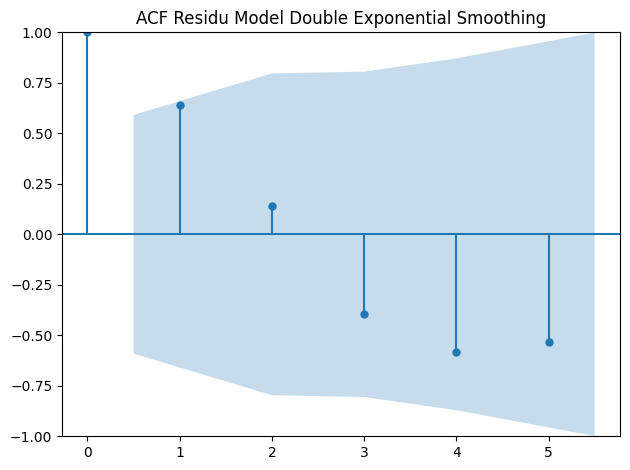

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest, norm
from statsmodels.graphics.tsaplots import plot_acf

# -------------------------
# 1) Ambil residu
# -------------------------
# residuals = y_test - best_pred   # jika sudah punya data test & prediksi
# misal residuals sudah ada, pastikan dalam bentuk array 1D
residuals = np.array(residuals).ravel()

# -------------------------
# 2) Uji normalitas K-S
# -------------------------
# Standardisasi residu
resid_std = (residuals - np.mean(residuals)) / np.std(residuals, ddof=1)

# Lakukan Kolmogorov-Smirnov test terhadap distribusi normal standar
ks_stat, ks_pval = kstest(resid_std, 'norm')

print("=== Uji Normalitas Residu (Kolmogorov-Smirnov) ===")
print(f"KS Statistik : {ks_stat:.4f}")
print(f"P-value      : {ks_pval:.4f}")

if ks_pval > 0.05:
    print("→ Residu tidak menolak H0 (distribusi normal).")
else:
    print("→ Residu menolak H0 (bukan distribusi normal).")

# -------------------------
# 3) Plot ACF residu
# -------------------------
plt.figure(figsize=(8,4))
plot_acf(residuals, lags=min(20, len(residuals)//2))
plt.title("ACF Residu Model Double Exponential Smoothing")
plt.tight_layout()
plt.show()

# ARIMA

c:\Users\AS\Downloads\python3.11.9\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AS\Downloads\python3.11.9\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AS\Downloads\python3.11.9\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AS\Downloads\python3.11.9\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AS\Downloads\python3.11.9\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency i

=== Best ARIMA Model ===
Order (p,d,q): (0, 2, 0)
MAPE on Test : 0.03%


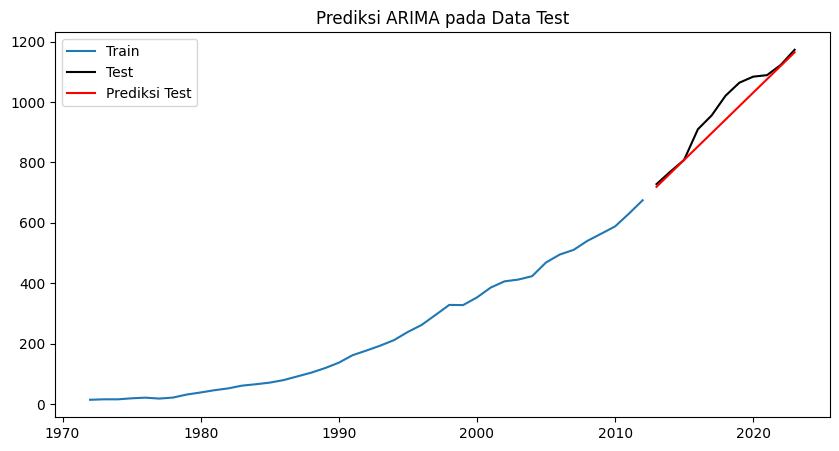

c:\Users\AS\Downloads\python3.11.9\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AS\Downloads\python3.11.9\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\AS\Downloads\python3.11.9\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YE-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\AS\AppData\Local\Temp\ipykernel_20436\719510307.py:71: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start="2023", periods=forecast_years, freq="Y")


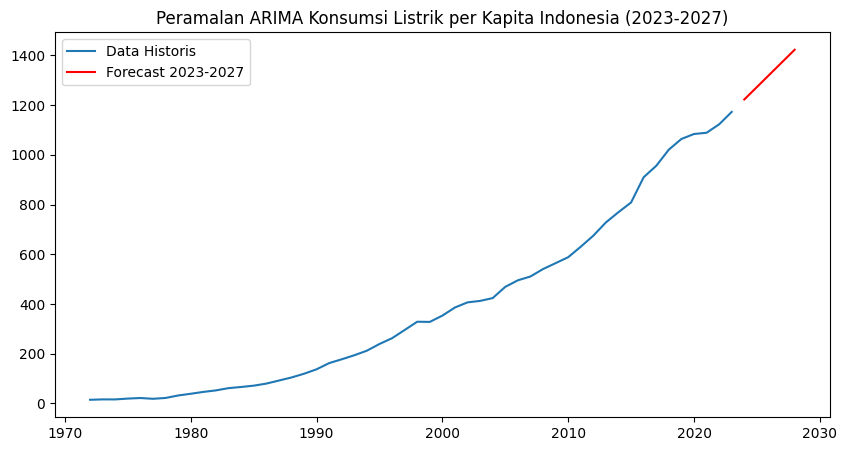


=== Forecast 2023-2027 ===
2023-12-31    1223.0
2024-12-31    1273.0
2025-12-31    1323.0
2026-12-31    1373.0
2027-12-31    1423.0
Freq: YE-DEC, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

# ================================
# 1) Load & siapkan data
# ================================
# Asumsi df sudah ada dengan kolom: "Tanggal", "Konsumsi Listrik per Kapita Indonesia"
df["Tanggal"] = pd.to_datetime(df["Tanggal"])
df = df.set_index("Tanggal")
y = df["Konsumsi Listrik per Kapita Indonesia"]

# Split train-test (80%-20%)
split_idx = int(len(y) * 0.8)
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# ================================
# 2) Grid Search ARIMA
# ================================
best_mape = np.inf
best_order = None
best_model = None
best_pred = None

# Batasi grid agar tidak terlalu lama (misalnya p,d,q max 3)
for p in range(0, 4):
    for d in range(0, 3):
        for q in range(0, 4):
            try:
                model = ARIMA(y_train, order=(p, d, q))
                fit = model.fit()
                pred = fit.forecast(steps=len(y_test))
                
                mape = mean_absolute_percentage_error(y_test, pred)
                
                if mape < best_mape:
                    best_mape = mape
                    best_order = (p, d, q)
                    best_model = fit
                    best_pred = pred
            except:
                continue

print("=== Best ARIMA Model ===")
print(f"Order (p,d,q): {best_order}")
print(f"MAPE on Test : {best_mape:.2f}%")

# ================================
# 3) Plot hasil prediksi test
# ================================
plt.figure(figsize=(10,5))
plt.plot(y_train.index, y_train, label="Train")
plt.plot(y_test.index, y_test, label="Test", color="black")
plt.plot(y_test.index, best_pred, label="Prediksi Test", color="red")
plt.legend()
plt.title("Prediksi ARIMA pada Data Test")
plt.show()

# ================================
# 4) Forecast hingga 2027
# ================================
# Fit ulang dengan seluruh data menggunakan best_order
final_model = ARIMA(y, order=best_order).fit()

forecast_years = 2027 - y.index[-1].year
forecast = final_model.forecast(steps=forecast_years)

# Buat index tahun 2023-2027
forecast_index = pd.date_range(start="2023", periods=forecast_years, freq="Y")
forecast = pd.Series(forecast.values, index=forecast_index)

# Plot hasil forecast
plt.figure(figsize=(10,5))
plt.plot(y, label="Data Historis")
plt.plot(forecast, label="Forecast 2023-2027", color="red")
plt.legend()
plt.title("Peramalan ARIMA Konsumsi Listrik per Kapita Indonesia (2023-2027)")
plt.show()

# Print hasil forecast
print("\n=== Forecast 2023-2027 ===")
print(forecast)